<a href="https://colab.research.google.com/github/hebephoh/Studying/blob/main/Lab1_fract_analize_Imkhasina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# л1. Вычислить емкостную размерность ч/б изображения с помощью метода наименьших квадратов

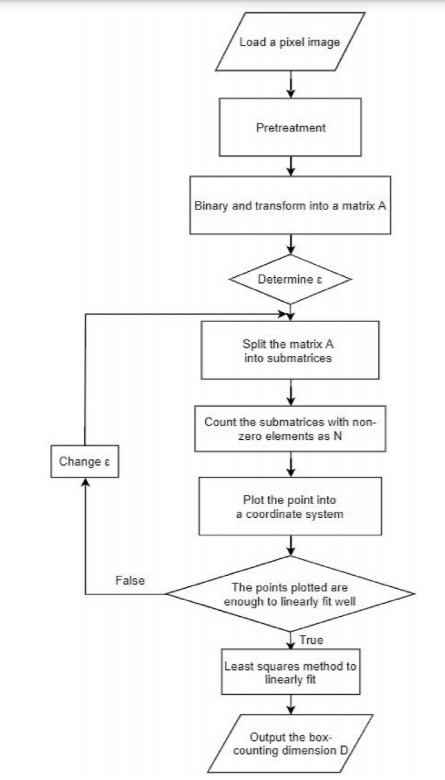

The box-counting dimension is estimated by least squares method through a linear equation:
Y = D * X + A 
where Y = log(N) and X = log (1/ε).

Fractal has not been defined very strictly yet. But for most fractals,
their fractal dimension is a non-integer value between 1 and 2.

ист: https://www.researchgate.net/post/How-can-I-calculate-the-Fractal-Dimension-of-an-object-using-Box-counting-method-in-Image-J

In [7]:
import numpy as np
import scipy

In [8]:
def boxCounting(Z, size):
  #add.reduceat используется для деления и подсчета элемента массива
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], size), axis=0),
                               np.arange(0, Z.shape[1], size), axis=1)

        # выбираем те где есть черные точки
        count = 0
        for x in range(S.shape[0]):
            for y in range(S.shape[1]):
                if S[x][y] > 0 & S[x][y] < size * size:
                    count += 1;
        return count

In [32]:
import numpy as np
import scipy

def fractalDimension(Z, threshold=0.6):#0.5
    #Шаг 3.  binary transform matrix
    #от оттенков серого к ч/б ч(0), б(1)
    Z = (Z < threshold)
    #Ш 4. Determine Eps
    # Minimal dimension of image
    a = min(Z.shape)
    n1 = 2**np.floor(np.log(a)/np.log(2))
    # Extract the exponent
    n2 = int(np.log(n1)/np.log(2))
    # Build successive box sizes (from 2^n down to 2^1)
    sizes = 2**np.arange(n2, 1, -1)
    #print (sizes) [1024  512  256  128   64   32   16    8    4]
    counts = []
    #Ш 5.Подсчет с разбитием
    for size in sizes:
        counts.append(boxCounting(Z, size))

    #МНК
    #leastSquares = np.polyfit(np.log(1/sizes), np.log(counts), 1)  
    leastSquares = np.polyfit(np.log(sizes), np.log(counts), 1)    
    return -leastSquares[0]

#Шаг 1.load image
import cv2
from google.colab.patches import cv2_imshow
original = cv2.imread('bw2.jpg') #output: 2048 1318 1.299072
# original = cv2.imread('bw1.png') output: 792 1584 1.5724228093086527
#original = cv2.imread('bw4.jpg') #output: 1390 1300 1.68094961
#original = cv2.imread('bw8.jpg') #output: 183 275 1.81591
h, w,c= original.shape
print ("height= ")
print (h)
print ("widh= ")
print (w)
#Шаг 2. pretrainment
grayIm = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
#threshold - порог. Порог определяет, когда пиксель находится в подмножестве или нет.
threshold=cv2.threshold(grayIm, 127, 255, cv2.THRESH_BINARY)[0] / 255
#Передаем изображение в функцию для вычисления размерности 
print("фрактальная размерность: ", fractalDimension(grayIm, threshold))

height= 
2048
widh= 
1318
фрактальная размерность:  1.299072781949346


In [ ]:
cv2.imwrite("gs.jpg", grayImage) 

True

пример работы метода reduceat

In [ ]:
array = np.arange(10)
indices = np.array([1,3,4,5])
output = np.add.reduceat(array,indices)  
print(output)
print(array)
print("Step1 : ", np.add.reduce(array[1:3]))
#print("Step1 : ", np.add.reduce(array[2:3]))
print("Step2 : ", np.add.reduce(array[3:4]))
print("Step3 : ", np.add.reduce(array[4:5]))
print("Step4 : ", np.add.reduce(array[5:]))

[ 3  3  4 35]
[0 1 2 3 4 5 6 7 8 9]
Step1 :  3
Step2 :  3
Step3 :  4
Step4 :  35


размер изображения

In [14]:
#Step 1. Get image
import cv2
img = cv2.imread("bw2.jpg")
#Step 2. Get size
h, w,c= img.shape
print (h,w)

2048 1318


1318 2048


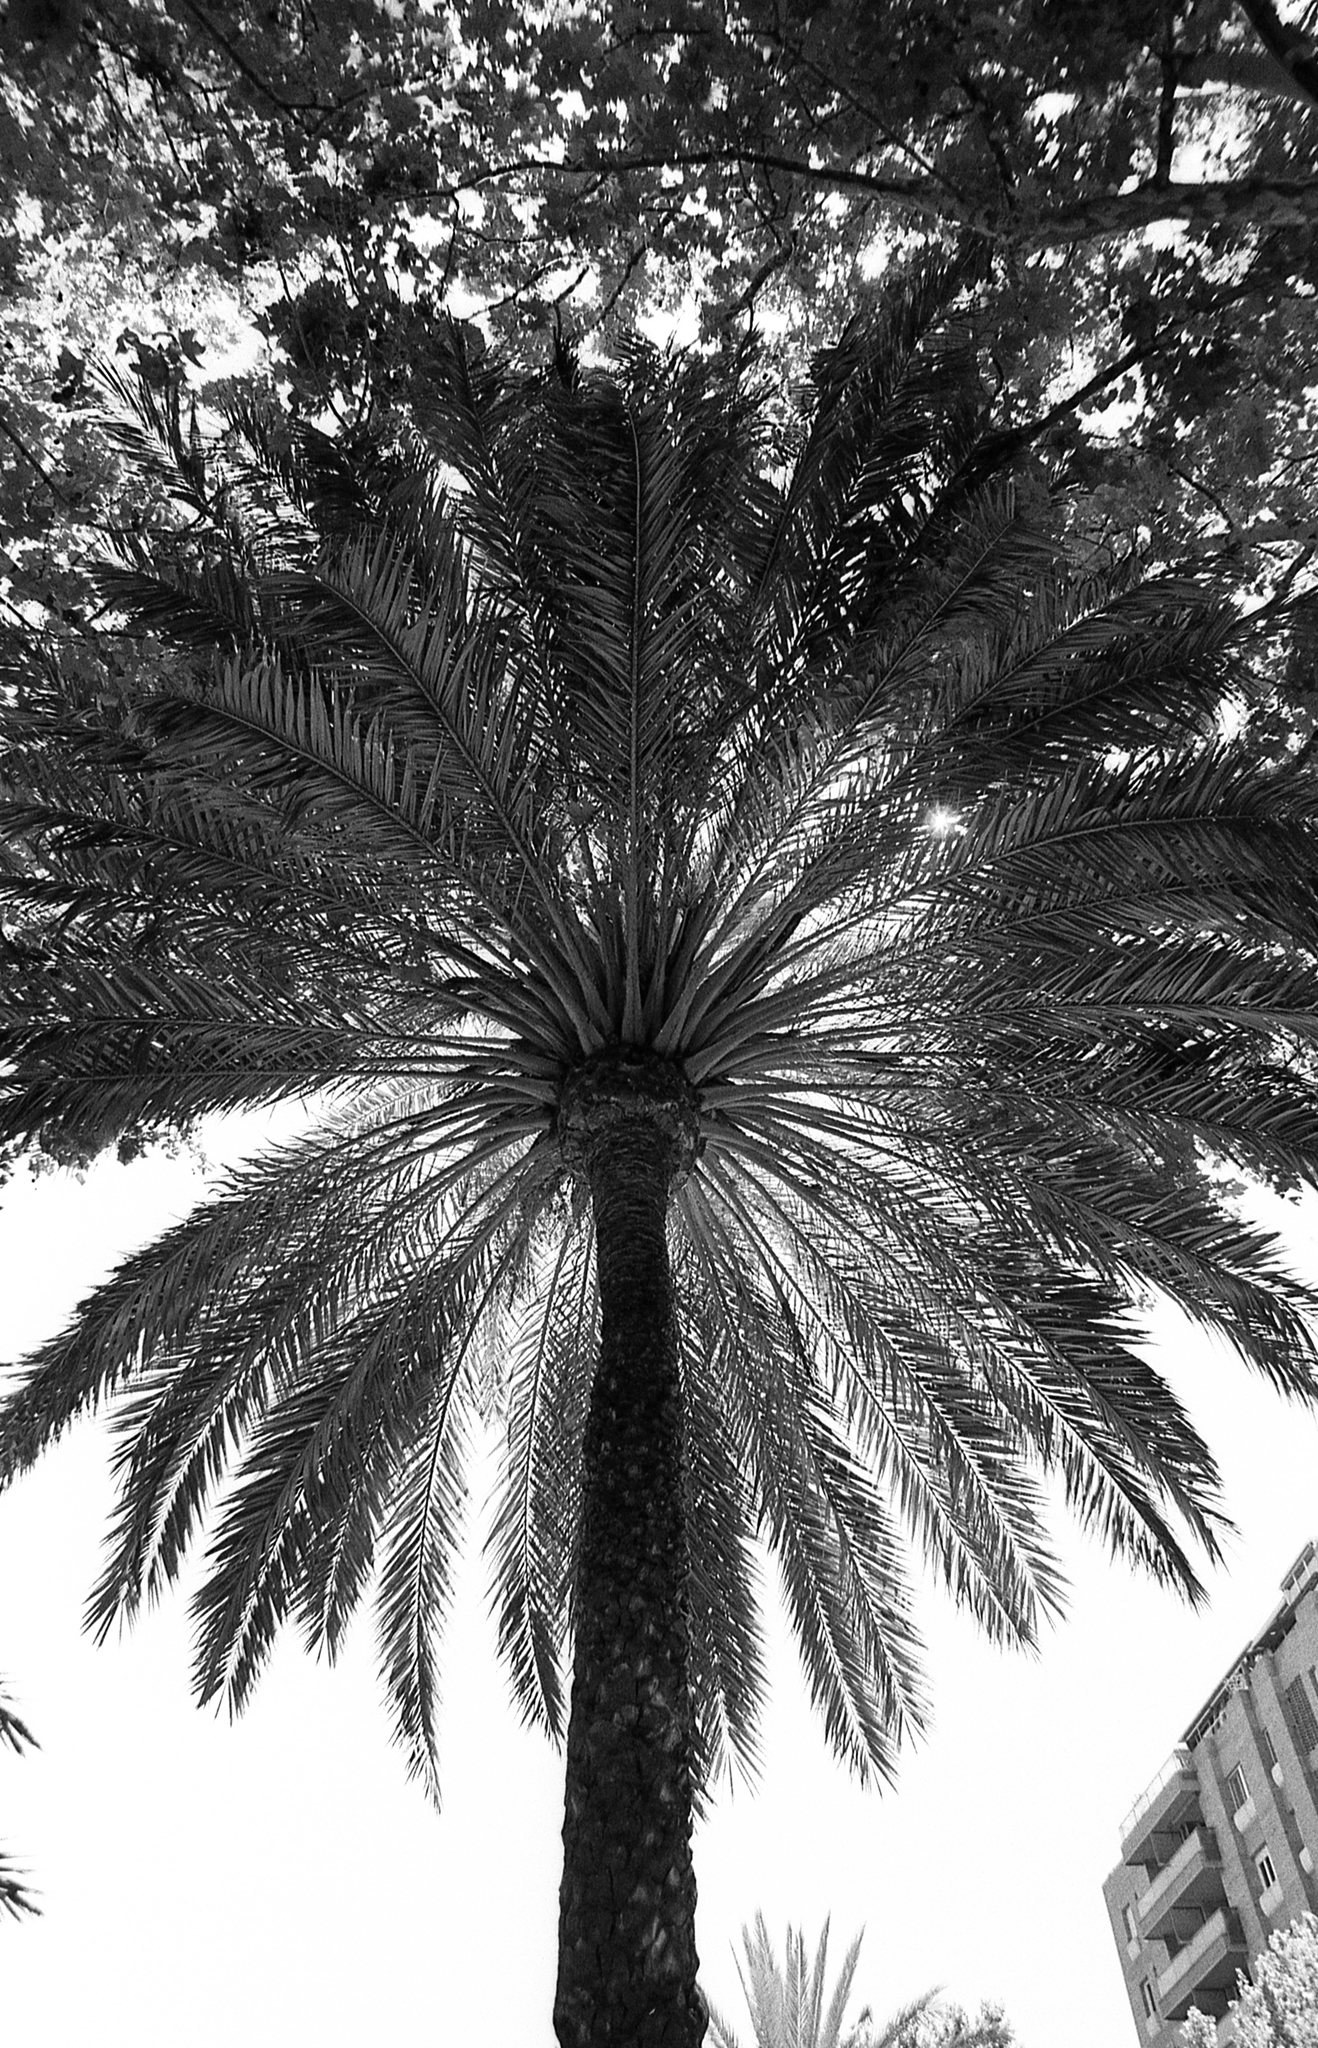

In [15]:
import PIL
from PIL import Image as img
i= img.open('/content/bw2.jpg')
h, w = i.size
print (h,w)
i

-----------------